# Analysis Objectives

The factors that contribute to the success of live streamers
1. Exploring the various factors contributing to the success of top streamers through Twitch data involves analyzing a variety of metrics and characteristics. 
2. To analyze the correlation between different factors contributing to the success of top streamers, create a correlation matrix using relevant data collected from Twitch. 

# 1. Load and Examine Data

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import altair as alt
import seaborn as sns
%matplotlib inline
import matplotlib.colors as mcolors
import altair as alt

color = sns.color_palette('pastel')
sns.set_style('whitegrid')


In [30]:
data = pd.read_csv('/Users/zhazk/Desktop/UCB DA/Data Visualization/Final project/archive/twitchdata-update.csv')
data.head(10)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
5,Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781,True,False,English
6,NICKMERCS,3360675195,136275,115633,24181,4074287,1089824,46084211,True,False,English
7,Fextralife,3301867485,147885,68795,18985,508816,425468,670137548,True,False,English
8,loltyler1,2928356940,122490,89387,22381,3530767,951730,51349926,True,False,English
9,Anomaly,2865429915,92880,125408,12377,2607076,1532689,36350662,True,False,English


In [31]:
print(f'----------------------------------------------------------------------------------------------------------------------')
print(f'Data Size: {data.shape}')
print(f'----------------------------------------------------------------------------------------------------------------------')
print(f'Data Description: {data.describe()}')
print(f'----------------------------------------------------------------------------------------------------------------------')
print(f'Data Duplicates:{data.duplicated()}')
print(f'----------------------------------------------------------------------------------------------------------------------')
print(f'Null values:{data.isnull().sum()}')

----------------------------------------------------------------------------------------------------------------------
Data Size: (1000, 11)
----------------------------------------------------------------------------------------------------------------------
Data Description:        Watch time(Minutes)  Stream time(minutes)   Peak viewers  \
count         1.000000e+03           1000.000000    1000.000000   
mean          4.184279e+08         120515.160000   37065.051000   
std           5.496355e+08          85376.201364   60314.307686   
min           1.221928e+08           3465.000000     496.000000   
25%           1.631899e+08          73758.750000    9113.750000   
50%           2.349908e+08         108240.000000   16676.000000   
75%           4.337399e+08         141843.750000   37569.750000   
max           6.196162e+09         521445.000000  639375.000000   

       Average viewers     Followers  Followers gained  Views gained  
count      1000.000000  1.000000e+03      1.000

Above we can see that the data consists of 1000 rows and 11 columns, has no duplicates, and has no null values.

In [32]:
data.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


# 2. Languages Analysis

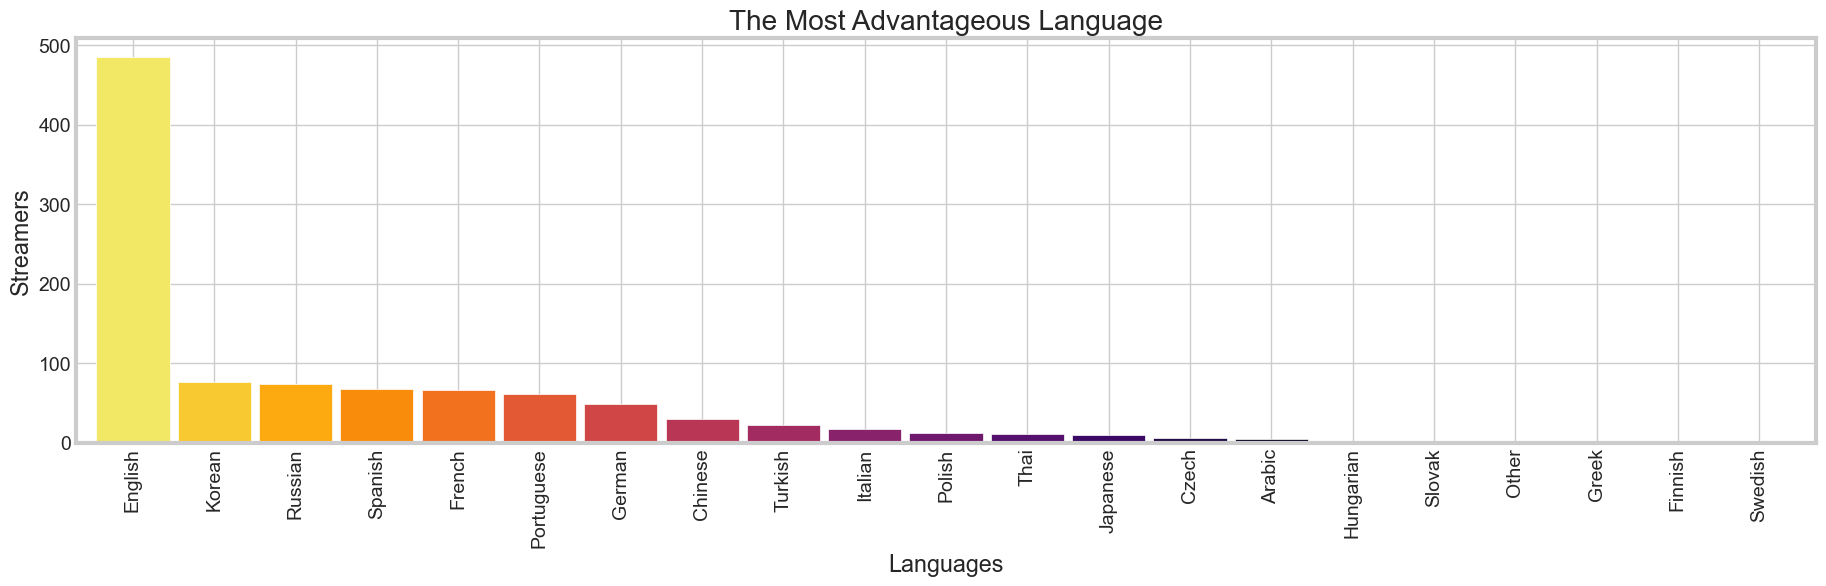

In [33]:
plt.figure(figsize=(20,5))
lang = data.Language.value_counts().sort_values(ascending= False)
lang.plot.bar(width=0.9, color = sns.color_palette('inferno_r',15))
plt.xlabel('Languages')
plt.ylabel('Streamers')
plt.title('The Most Advantageous Language')
plt.savefig('/Users/zhazk/Desktop/UCB DA/Data Visualization/Final project/archive/The Most Advantageous Language.png',dpi=100)
plt.show()



# 3. Contents Analysis (Maturity & Partnerships)

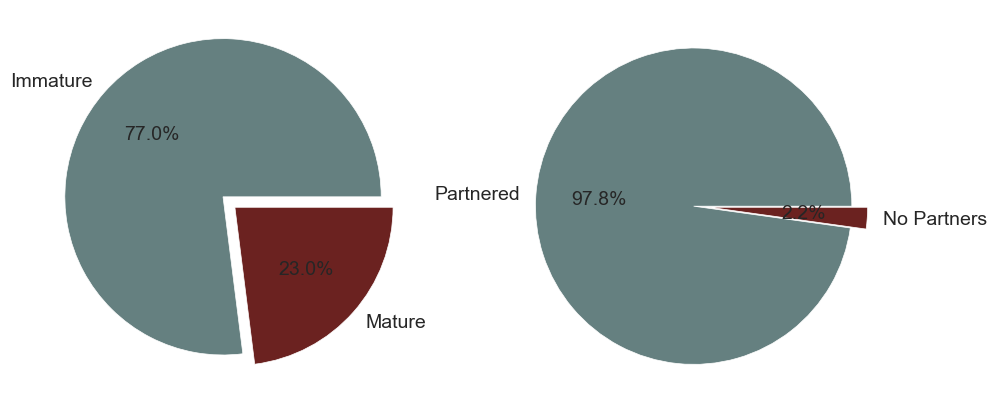

In [34]:
fig,axs = plt.subplots(1,2,figsize=(10,5))

mature = data.Mature.value_counts().to_list()
partner = data.Partnered.value_counts().to_list()

angle1 = -180 * mature[0]
angle2 = -180 * partner[0]

labels1 = ['Immature', 'Mature']
labels2 = ['Partnered', 'No Partners']

explode = [0.1, 0]
axs[0].pie(mature, autopct='%1.1f%%', startangle=angle1,
                     labels=labels1, explode=explode,colors=['#658080','#6B2220'])
axs[1].pie(partner, autopct='%1.1f%%', startangle=angle2,
                     labels=labels2, explode=explode,colors=['#658080','#6B2220'])
plt.show()


# 4. Top 20 Channel by peak and average viewers analysis

Print out the top 20 channels by average and max viewership

In [35]:
## get our top 20 streamers
view_stat = data.sort_values(by = 'Average viewers', ascending = False).head(20)

avg_views = alt.Chart(view_stat).mark_bar(opacity= 0.5, strokeWidth = 1, stroke = 'black').encode(
    x=alt.X('Channel:N', title = 'Streamers Name', sort = '-y'),
    y=alt.Y('Average viewers:Q', title = 'Avg.Viewer'),
    tooltip=['Channel','Average viewers']
)

## get top 20 streamers
view_stat = data.sort_values(by = 'Peak viewers',ascending=False).head(20)

max_views = alt.Chart(view_stat).mark_bar(opacity=0.5,strokeWidth=1, stroke = 'black').encode(
    x=alt.X('Channel:N', title= 'Streamers Name', sort = '-y'),
    y=alt.Y('Peak viewers:Q', title='Peak Viewer'),
    tooltip = ['Channel','Peak viewers']
    )
(avg_views | max_views).interactive().properties(title='Viewership Statistics')

alt.HConcatChart(...)

Comparison between Top peak and average viewers

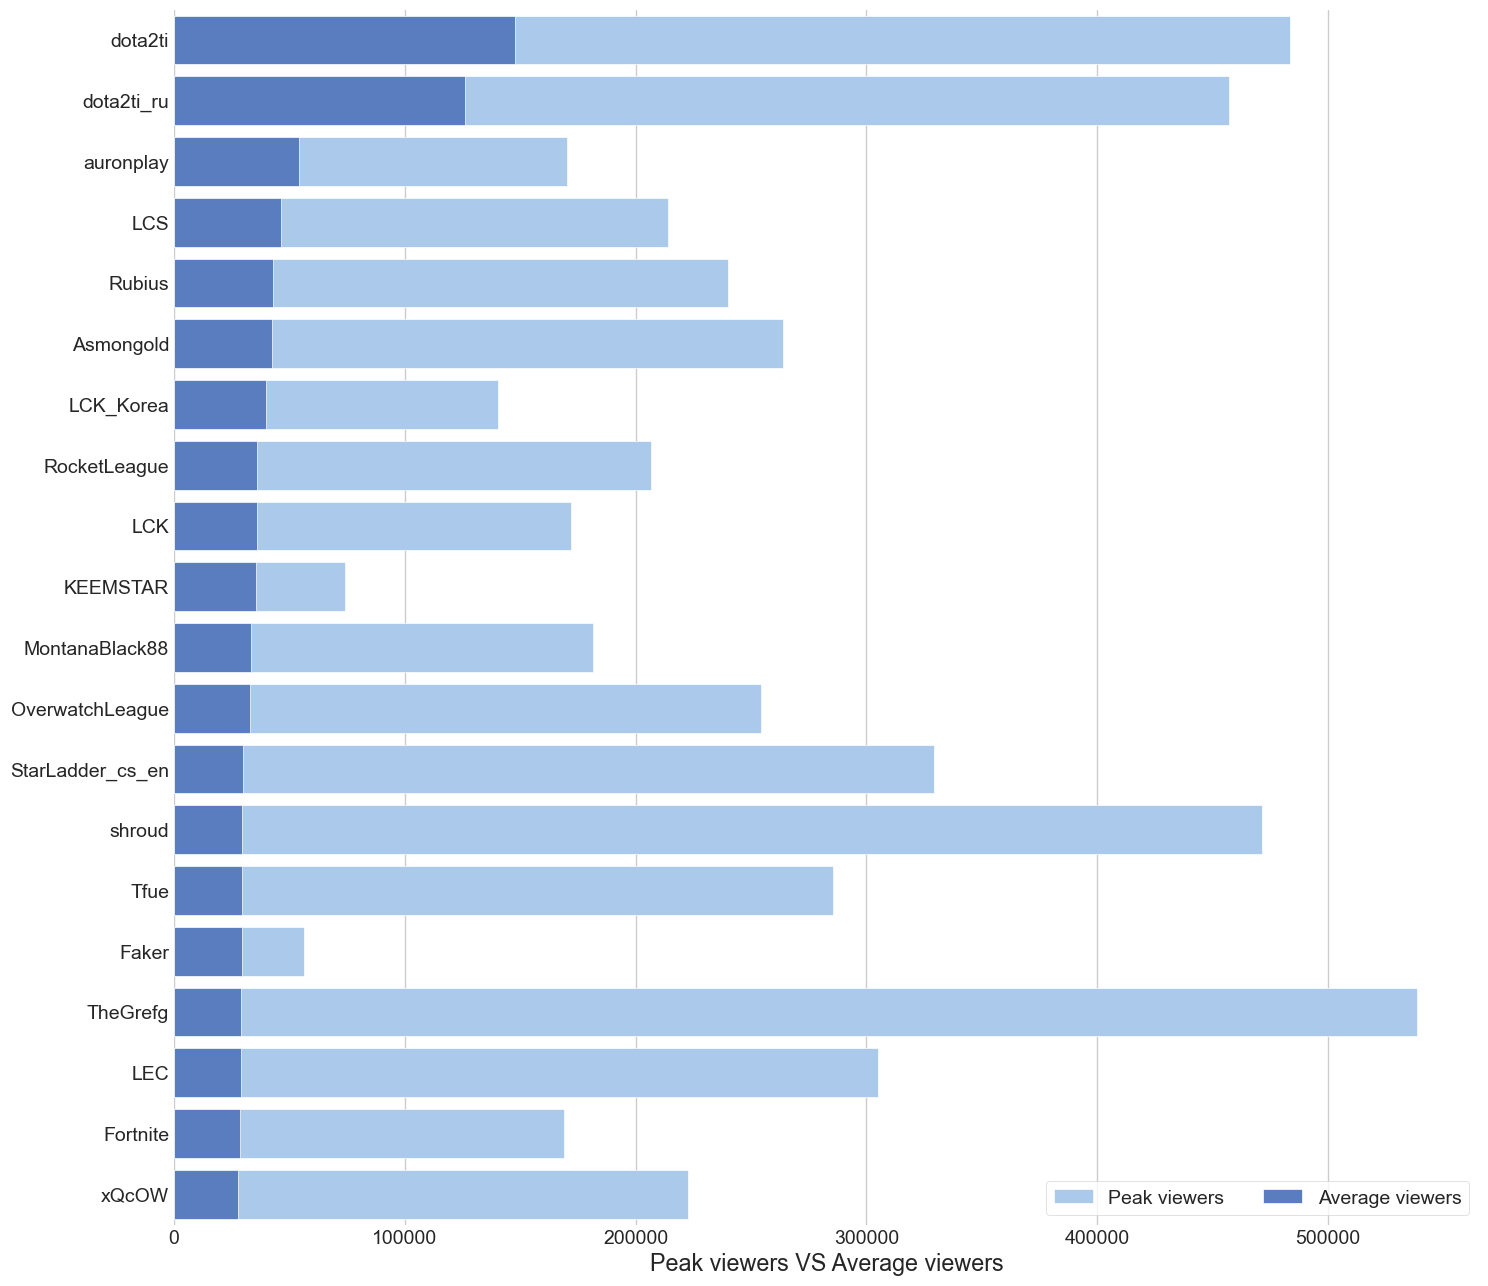

In [36]:
#peak view and average view
#viewer = data.sort_values(by = 'Average viewers', ascending = False).head(20)


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Load the dataset
view = data.sort_values(by = 'Average viewers', ascending = False).head(20)

# Plot the total Peak viewers
sns.set_color_codes("pastel")
sns.barplot(x="Peak viewers", y="Channel", data=view,
            label="Peak viewers", color="b")

# Plot the Average viewers
sns.set_color_codes("muted")
sns.barplot(x="Average viewers", y="Channel", data=view,
            label="Average viewers", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Peak viewers VS Average viewers")
sns.despine(left=True, bottom=True)

# 5. Watch time and Stream time of Channels Analysis

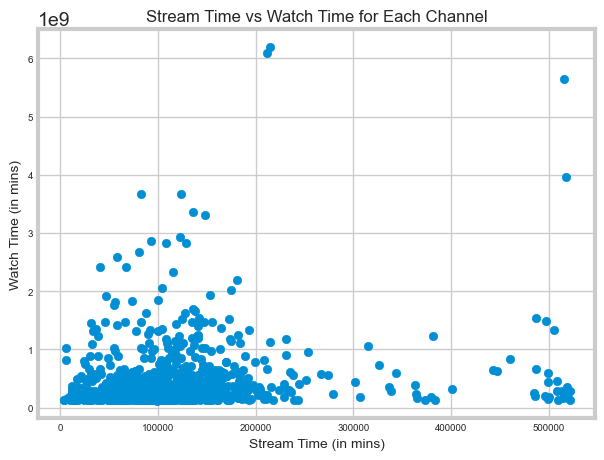

In [37]:
plt.scatter(data['Stream time(minutes)'], data['Watch time(Minutes)'])
plt.xlabel('Stream Time (in mins)',fontsize=10)
plt.ylabel('Watch Time (in mins)',fontsize=10)
plt.title('Stream Time vs Watch Time for Each Channel',fontsize=12)
plt.tick_params(axis='both',labelsize=7) 
plt.show()

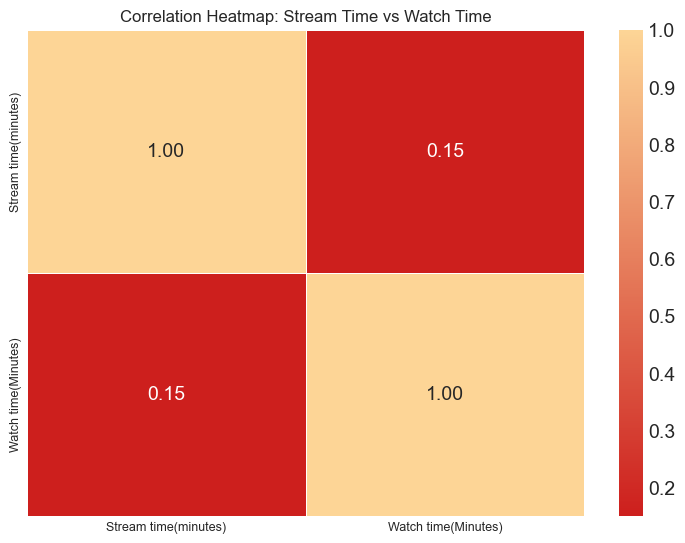

In [38]:
correlation_matrix = data[['Stream time(minutes)', 'Watch time(Minutes)']].corr()

cmap = mcolors.LinearSegmentedColormap.from_list('custom_gradient', ['#CD1F1D','#FDD596'], N=256)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Stream Time vs Watch Time',fontsize=12)
plt.tick_params(axis='both',labelsize=9) 
plt.show()

Watch time vs views gained for top 10 streams

Text(0.5, 1.0, 'Top Streams by Views Gained and Watch Time')

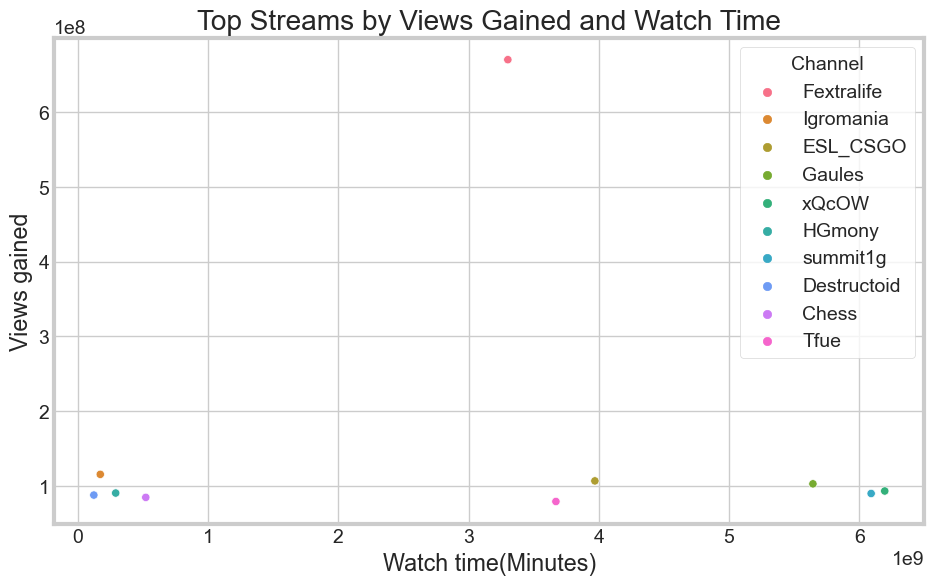

In [39]:
# watch time vs. views gained for top streams
top_views_gained = data.sort_values('Views gained', ascending=False)[:10]
plt.figure(figsize=(10,6))
sns.scatterplot(x='Watch time(Minutes)', y='Views gained', hue='Channel', data=top_views_gained)
plt.title('Top Streams by Views Gained and Watch Time')

Most channels have a constant number of viewers gained at the start of the stream and as the stream continues. However we have Fextralife channel that gaines a huge amount of viewers around minute three into the stream.

Average viewership over time

Text(0.5, 1.0, 'Average Viewership Over Stream Time')

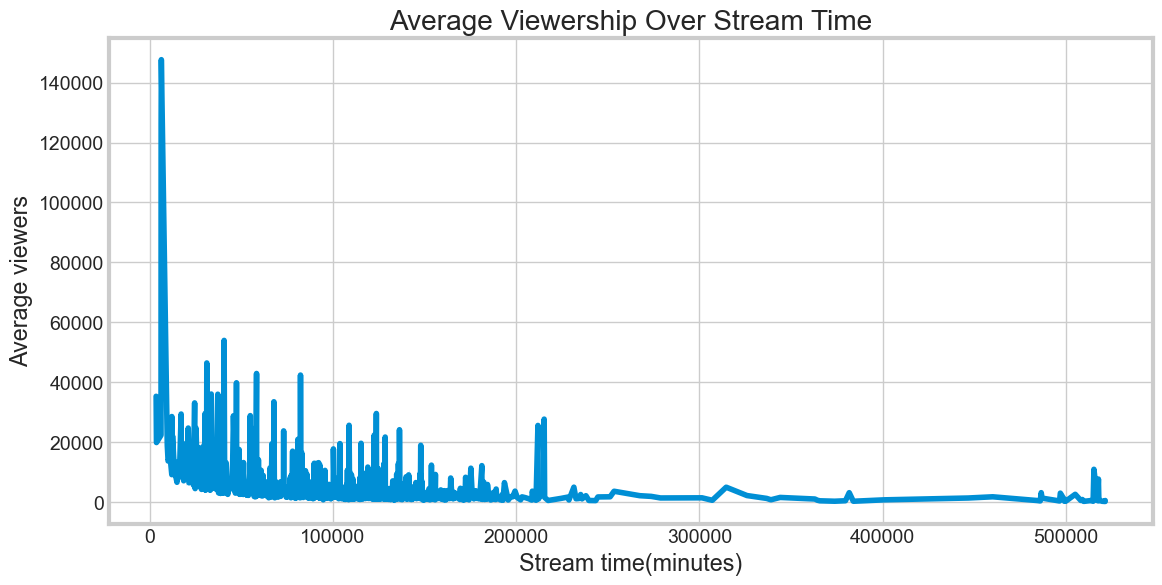

In [40]:
#  average viewership over time
plt.figure(figsize=(12,6))
sns.lineplot(x='Stream time(minutes)', y='Average viewers', data=data)
plt.title('Average Viewership Over Stream Time')

Relationship between stream time and viewership metrics.There is a decline of average viewers over time.

Distribution of Peak Viewership

Text(0.5, 1.0, 'Distribution of Peak Viewership')

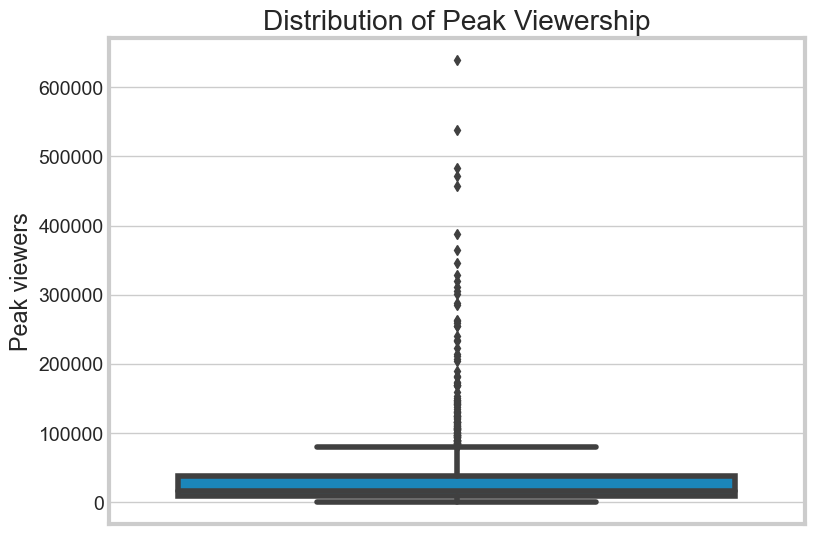

In [41]:
# peak viewership
plt.figure(figsize=(8,6))
sns.boxplot(y='Peak viewers', data=data)
plt.title('Distribution of Peak Viewership')

general peak viewership is below 100000 with exception of when the values goes up toabove 600000

# 6. Followers Analysis

In [42]:
high_data = data.nlargest(1, 'Followers')
string1 = high_data[['Channel', 'Followers']].to_string(index=False, header=False)

print('Highest number of followers:')
print(string1)

print('-----------------------------------')

low_data = data.nsmallest(1,'Followers')
string2 = low_data[['Channel','Followers']].to_string(index=False,header=False)
print('Lowest number of followers : ')
print(string2)

Highest number of followers:
Tfue 8938903
-----------------------------------
Lowest number of followers : 
voicetv 3660


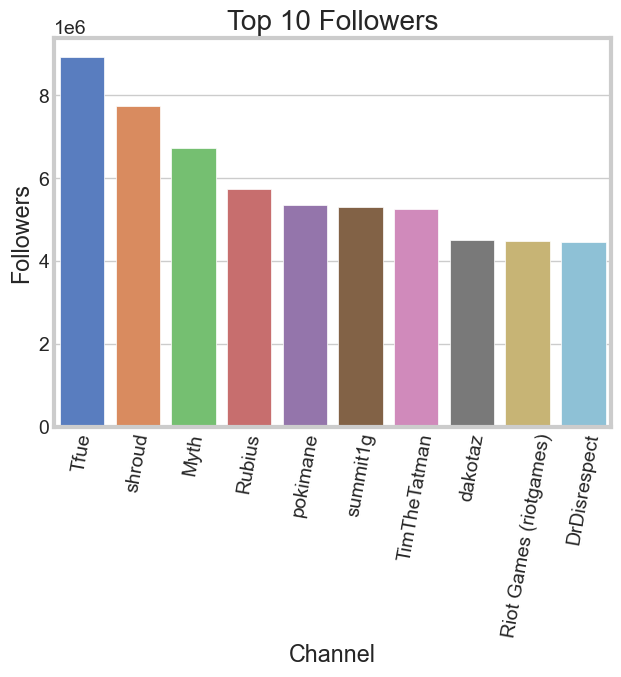

In [43]:
top_ten = data.sort_values(by = 'Followers', ascending = False).head(10)
sns.barplot(data = top_ten, x='Channel', y='Followers', palette="muted")
plt.title("Top 10 Followers")
plt.xticks(rotation=80)
plt.show()


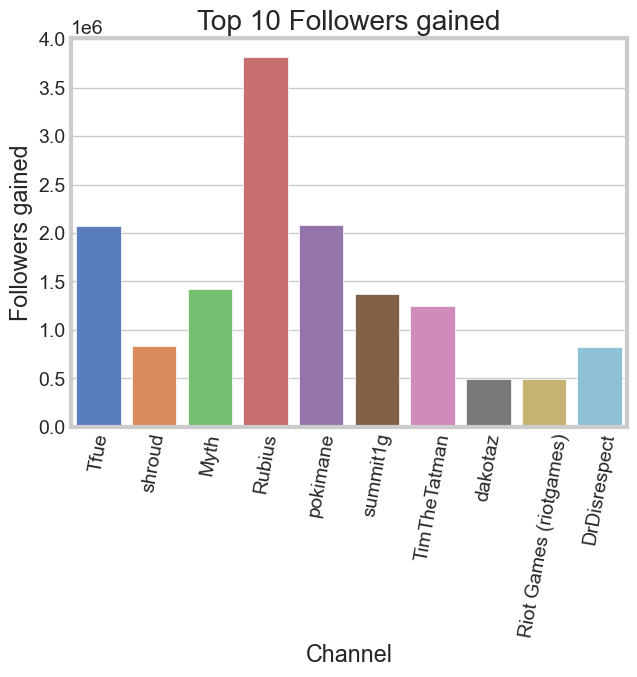

In [44]:
top_teng = data.sort_values(by = 'Followers gained', ascending = False).head(10)
sns.barplot(data = top_ten, x='Channel', y='Followers gained', palette="muted")
plt.title("Top 10 Followers gained")
plt.xticks(rotation=80)
plt.show()

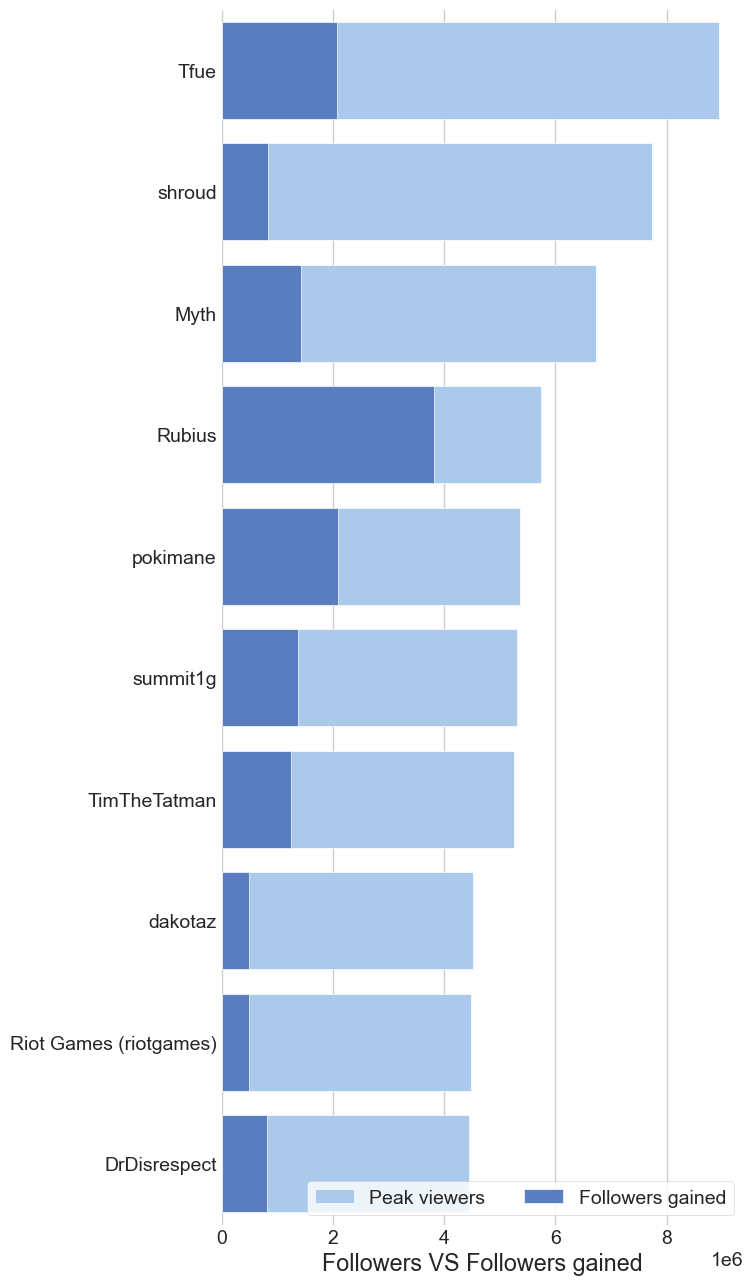

In [45]:
#Followers and Followers gained

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the dataset
fol = data.sort_values(by = 'Followers', ascending = False).head(10)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Followers", y="Channel", data=fol,
            label="Peak viewers", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Followers gained", y="Channel", data=fol,
            label="Followers gained", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Followers VS Followers gained")
sns.despine(left=True, bottom=True)

Text(0.5, 1.0, 'Followers Gained vs. Watch Time')

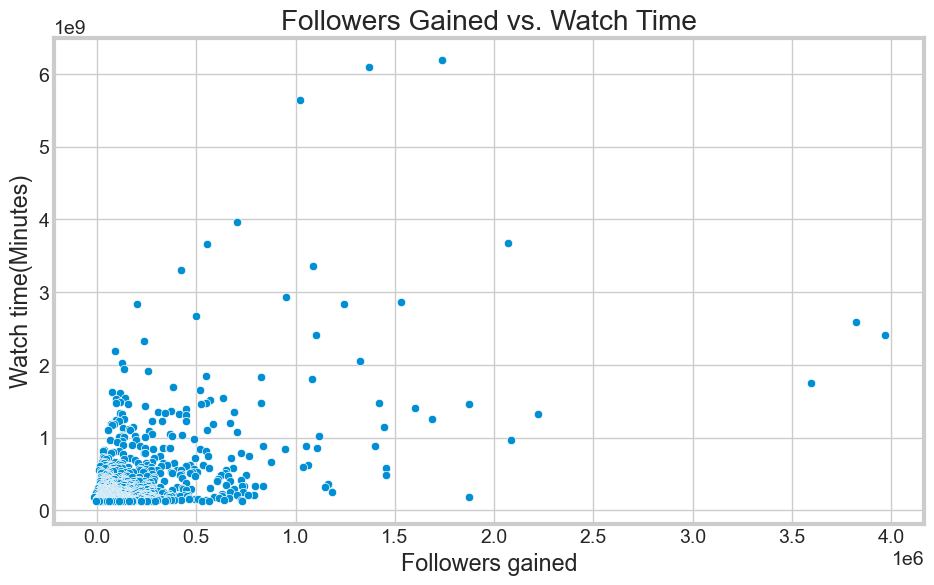

In [46]:
# followers gained vs. watch time
plt.figure(figsize=(10,6))
sns.scatterplot(x='Followers gained', y='Watch time(Minutes)', data=data)
plt.title('Followers Gained vs. Watch Time')

Most channels gain followers at a constant rate , however, the highers the watch time the more the number of ollowers gained.

Text(0.5, 1.0, 'Distribution of Followers')

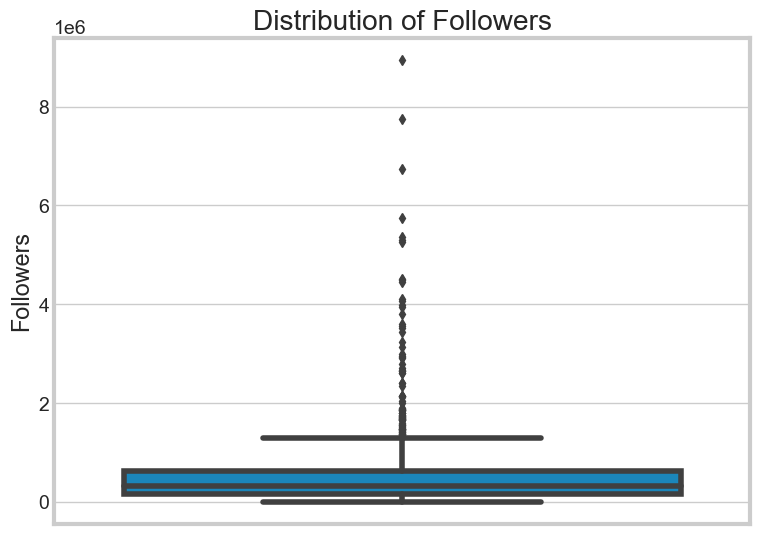

In [47]:
# Distribution of Followers
plt.figure(figsize=(8,6))
sns.boxplot(y='Followers', data=data)
plt.title('Distribution of Followers')

# 7. Correlation between factors contributing to the top streamers

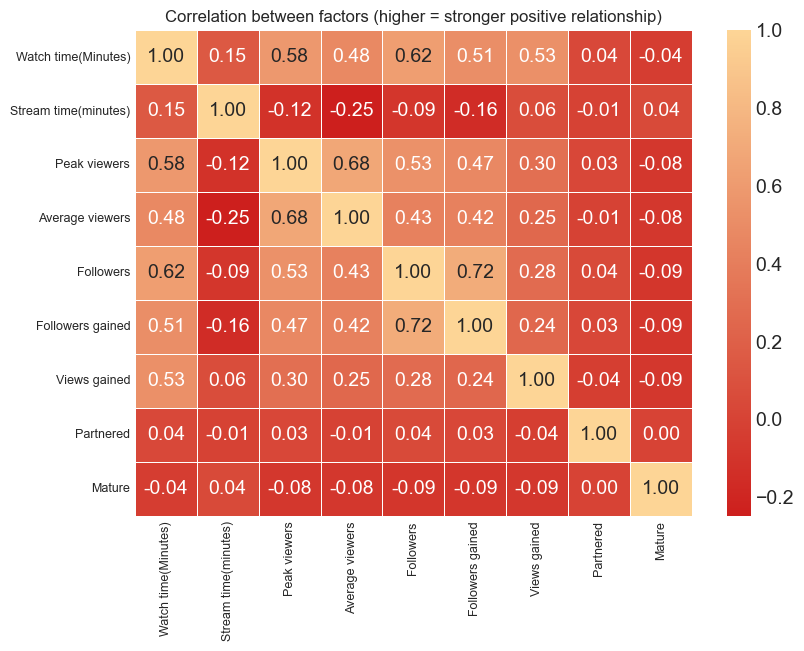

In [48]:
cor_matrix = data.corr()

cmap = mcolors.LinearSegmentedColormap.from_list('custom_gradient', ['#CD1F1D','#FDD596'], N=256)

plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5)
plt.title('Correlation between factors (higher = stronger positive relationship)',fontsize=12)
plt.tick_params(axis='both',labelsize=9) 
plt.show()

In [49]:
print(cor_matrix['Average viewers'].sort_values(ascending=False))

Average viewers         1.000000
Peak viewers            0.682637
Watch time(Minutes)     0.476165
Followers               0.428303
Followers gained        0.420097
Views gained            0.250349
Partnered              -0.008983
Mature                 -0.081648
Stream time(minutes)   -0.249248
Name: Average viewers, dtype: float64


In [50]:
print(cor_matrix['Followers'].sort_values(ascending=False))

Followers               1.000000
Followers gained        0.715618
Watch time(Minutes)     0.620234
Peak viewers            0.532529
Average viewers         0.428303
Views gained            0.276467
Partnered               0.044418
Mature                 -0.088521
Stream time(minutes)   -0.091299
Name: Followers, dtype: float64


In [51]:
print(cor_matrix['Views gained'].sort_values(ascending=False))

Views gained            1.000000
Watch time(Minutes)     0.529862
Peak viewers            0.298063
Followers               0.276467
Average viewers         0.250349
Followers gained        0.244297
Stream time(minutes)    0.064370
Partnered              -0.035313
Mature                 -0.088119
Name: Views gained, dtype: float64


In [52]:
print(cor_matrix['Watch time(Minutes)'].sort_values(ascending=False))

Watch time(Minutes)     1.000000
Followers               0.620234
Peak viewers            0.582797
Views gained            0.529862
Followers gained        0.514648
Average viewers         0.476165
Stream time(minutes)    0.150588
Partnered               0.038258
Mature                 -0.043197
Name: Watch time(Minutes), dtype: float64
